In [9]:
import xarray as xr
import rioxarray as rxr
import numpy as np
import pandas as pd

import dask
from dask.distributed import Client, LocalCluster

import matplotlib.pyplot as plt
import os
import glob

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
import os
os.getcwd()

'/mnt/c/Users/val085/Documents/Python_codes/SDM'

In [3]:
%dirs

[]

Read all the TIFF files in the directory.

In [4]:
rlist = glob.glob("Rasters/*.tif")
rlist

['Rasters/cti.tif',
 'Rasters/disturb.tif',
 'Rasters/mi.tif',
 'Rasters/rainann.tif',
 'Rasters/raindq.tif',
 'Rasters/rugged.tif',
 'Rasters/soildepth.tif',
 'Rasters/soilfert.tif',
 'Rasters/solrad.tif',
 'Rasters/tempann.tif',
 'Rasters/tempmin.tif',
 'Rasters/topo.tif',
 'Rasters/vegsys.tif']

In [5]:
# function to get the base name of all raster files
def basename(paths):
    out = []
    for i in paths:
        fl = os.path.basename(i)
        bn, _ = fl.split('.')
        out.append(bn)
    return out

# read as a dask array and remove the filled values
def remove_fill(x):
    rr = rxr.open_rasterio(x, chunks={'x':1689, 'y':1797})
    return rr.where(rr != rr.attrs['_FillValue'])

In [6]:
name_var = xr.Variable('name', basename(rlist))
r = xr.concat([remove_fill(i) for i in rlist], dim=name_var)
r = r.to_dataset('name').squeeze() # drop unused dimention
r

<xarray.Dataset>
Dimensions:      (y: 5390, x: 3378)
Coordinates:
    band         int64 1
  * x            (x) float64 150.6 150.7 150.7 150.7 ... 153.7 153.7 153.7 153.7
  * y            (y) float64 -28.1 -28.1 -28.1 -28.11 ... -32.95 -32.95 -32.95
    spatial_ref  int64 0
Data variables: (12/13)
    cti          (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    disturb      (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    mi           (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    rainann      (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    raindq       (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    rugged       (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    ...           ...
    soilfert     (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    solrad       (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    tempann      (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    tempmin      (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    topo         (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
    vegsys       (y, x) float64 dask.array<chunksize=(1797, 1689), meta=np.ndarray>
Attributes:
    STATISTICS_MAXIMUM:  2849
    STATISTICS_MEAN:     1332.8259261776
    STATISTICS_MINIMUM:  889
    STATISTICS_STDDEV:   205.81484744644
    _FillValue:          65535.0
    scale_factor:        1.0
    add_offset:          0.0

CPU times: user 906 ms, sys: 519 ms, total: 1.43 s
Wall time: 1.48 s


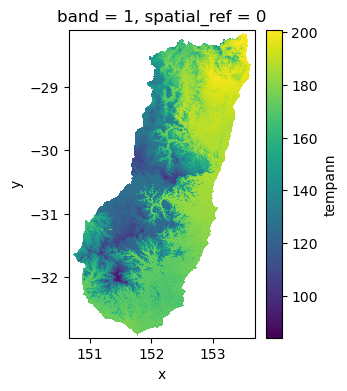

In [7]:
%%time
plt.figure(figsize=(3,4))
r.tempann.plot()

In [13]:
# import point data
points = pd.read_csv("Records/train_po/NSWtrain_po.csv")
points = points[points["spid"] == "nsw14"]
points

,siteid,spid,x,y,occ,group,cti,disturb,mi,rainann,raindq,rugged,soildepth,soilfert,solrad,tempann,tempmin,topo,vegsys
1149,dbpo1152,nsw14,153.4879,-28.1642,1,db,1339,3,88,1590,216,11,1139,2,89,200,85,-1,5
1150,dbpo1153,nsw14,153.4838,-28.1651,1,db,1439,3,88,1592,216,15,1149,2,89,199,84,-3,5
1151,dbpo1154,nsw14,153.4930,-28.1696,1,db,1629,3,89,1594,222,1,1159,2,89,200,86,-1,5
1152,dbpo1155,nsw14,152.5070,-28.2522,1,db,1259,2,92,1580,222,28,1080,2,86,159,45,-3,2
1153,dbpo1156,nsw14,152.4990,-28.2567,1,db,1279,2,91,1568,222,51,1110,2,88,158,44,-3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,dbpo1463,nsw14,152.2111,-31.3936,1,db,1739,1,94,1508,198,68,1090,2,90,170,56,-28,2
1460,dbpo1464,nsw14,152.2174,-31.3981,1,db,1149,1,93,1438,186,57,1129,2,86,177,65,-10,2
1461,dbpo1465,nsw14,152.1206,-32.5170,1,db,1349,3,82,1400,276,7,1129,2,85,169,51,1,2
1462,dbpo1466,nsw14,151.9153,-32.5894,1,db,1409,2,73,1136,234,2,1120,2,86,173,51,0,3


In [18]:
x_coords = points["x"].values
y_coords = points["y"].values
x_coords.shape

(315,)

In [20]:
tann = r.tempann
tann

<xarray.DataArray 'tempann' (y: 5390, x: 3378)>
dask.array<getitem, shape=(5390, 3378), dtype=float64, chunksize=(1797, 1689), chunktype=numpy.ndarray>
Coordinates:
    band         int64 1
  * x            (x) float64 150.6 150.7 150.7 150.7 ... 153.7 153.7 153.7 153.7
  * y            (y) float64 -28.1 -28.1 -28.1 -28.11 ... -32.95 -32.95 -32.95
    spatial_ref  int64 0

In [31]:
value = tann.sel(x=x_coords, y=y_coords, method="nearest").values
value

array([[200., 200., 200., ...,  nan,  nan,  nan],
       [200., 199., 200., ...,  nan,  nan,  nan],
       [200., 200., 200., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ..., 169., 171., 171.],
       [ nan,  nan,  nan, ..., 171., 173., 171.],
       [ nan,  nan,  nan, ..., 171., 173., 171.]])

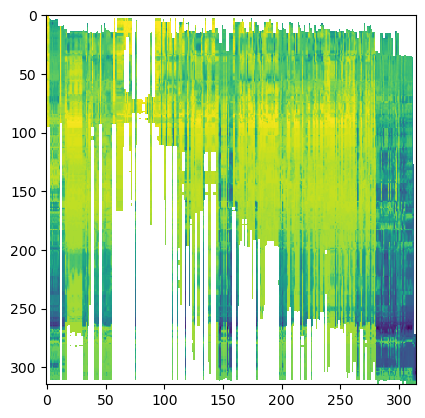

In [32]:
plt.imshow(value)

In [1]:
# python gdal2xyz.py -csv input.tif output.csv